# Laboratorio 4 Minería de Datos - Michael Chan 18562

#### Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#### Data exploration

In [3]:
data = pd.read_csv("insurance.csv")

In [9]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [6]:
data.shape

(348, 7)

In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002250D6A3FA0>]],
      dtype=object)

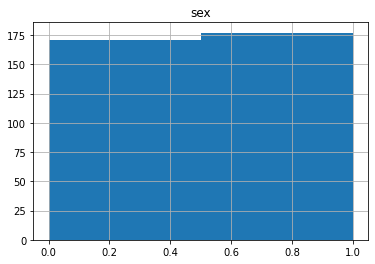

In [20]:
data.hist(column='sex', bins = 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002250D5AFB20>]],
      dtype=object)

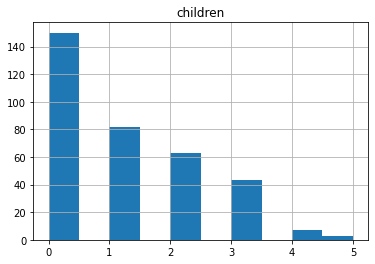

In [16]:
data.hist(column='children')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002250D621100>]],
      dtype=object)

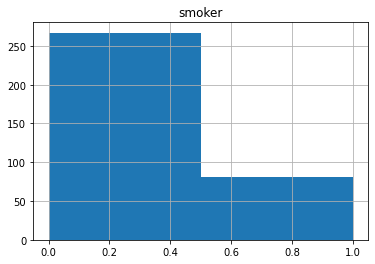

In [19]:
data.hist(column='smoker', bins =2)

#### Data preparation

In [26]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Ya que en ninguno de los dtypes tenemos 'object' entonces no existe ningún valor no numérico dentro de los valores.

#### Data preparation - encoding

In [44]:
labelencoder = LabelEncoder()

In [46]:
data['sex_E'] = labelencoder.fit_transform(data['sex'])

In [47]:
data['sex_E']

0      0
1      1
2      1
3      1
4      1
      ..
343    1
344    0
345    0
346    1
347    1
Name: sex_E, Length: 348, dtype: int64

In [48]:
data['smoker_E'] = labelencoder.fit_transform(data['smoker'])

In [50]:
data['smoker_E']

0      1
1      0
2      0
3      0
4      0
      ..
343    0
344    0
345    0
346    0
347    0
Name: smoker_E, Length: 348, dtype: int64

In [52]:
onehotencoder = OneHotEncoder(handle_unknown = 'ignore')

In [54]:
enc_df = pd.DataFrame(onehotencoder.fit_transform(data[['region']]).toarray())

In [55]:
data = data.join(enc_df)

In [58]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_E,smoker_E,0,1,2,3
0,19,0,27.900,0,1,3,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,1,0,0.0,1.0,0.0,0.0


#### Training and test division

In [105]:
p_train = 0.5 #train percentage

In [106]:
train = data[:int((len(data))*p_train)]

In [107]:
test = data[int((len(data))*p_train):]

#### Data preparation - Scale

In [108]:
scaler = StandardScaler()

In [109]:
scaler.fit_transform(data)

array([[-1.43036576, -1.01739261, -0.49424524, ..., -0.56850147,
        -0.61277571,  1.80108368],
       [-1.49982813,  0.98290472,  0.550655  , ..., -0.56850147,
         1.63191847, -0.55522129],
       [-0.80520451,  0.98290472,  0.41358972, ..., -0.56850147,
         1.63191847, -0.55522129],
       ...,
       [-0.38843033, -1.01739261, -0.25215592, ..., -0.56850147,
         1.63191847, -0.55522129],
       [-0.4578927 ,  0.98290472,  0.90310857, ..., -0.56850147,
         1.63191847, -0.55522129],
       [ 0.44511801,  0.98290472,  0.47500209, ..., -0.56850147,
        -0.61277571, -0.55522129]])

#### Modelación Lineal

In [110]:
X = train['charges'].values
Y = train['bmi'].values

In [111]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)

In [112]:
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

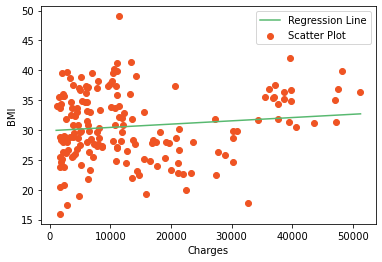

In [113]:
# Plotting Values and Regression Line
 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.legend()
plt.show()

##### Con otras variables

In [114]:
Y = train['age'].values
mean_y = np.mean(Y)

In [115]:
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

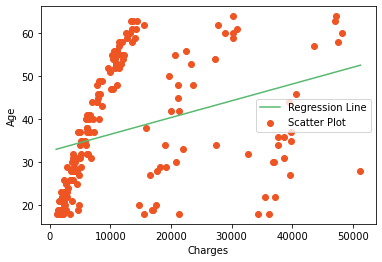

In [116]:
# Plotting Values and Regression Line
 
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Charges')
plt.ylabel('Age')
plt.legend()
plt.show()

#### Evaluación de los modelos

##### MAE

In [120]:
from sklearn.metrics import mean_absolute_error

In [121]:
y_train = train['bmi'].values
y_test = test['bmi'].values

In [122]:
mean_absolute_error(y_train, y_test)

6.228620689655171

In [123]:
y_train = train['age'].values
y_test = test['age'].values

In [124]:
mean_absolute_error(y_train, y_test)

18.57471264367816

##### MSE

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
y_train = train['bmi'].values
y_test = test['bmi'].values

In [127]:
mean_squared_error(y_train, y_test)

62.84041379310344

In [128]:
y_train = train['age'].values
y_test = test['age'].values

In [129]:
mean_squared_error(y_train, y_test)

489.9080459770115

##### RMSE

In [132]:
import math

In [130]:
y_train = train['bmi'].values
y_test = test['bmi'].values

In [133]:
math.sqrt(mean_squared_error(y_train, y_test))

7.9271945726784985

In [134]:
y_train = train['age'].values
y_test = test['age'].values

In [135]:
math.sqrt(mean_squared_error(y_train, y_test))

22.133866494063152

#### Regresión Polinomial

In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

##### Modelo 1:

In [147]:
X = train['charges']
Y = train['bmi']
X_seq = np.linspace(X.min(),X.max(),174).reshape(-1,1)

In [155]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_seq,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

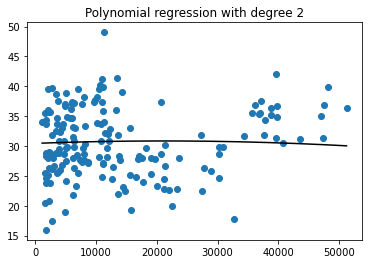

In [156]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

##### Modelo 2:

In [157]:
X = train['charges']
Y = train['age']
X_seq = np.linspace(X.min(),X.max(),174).reshape(-1,1)

In [158]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_seq,Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

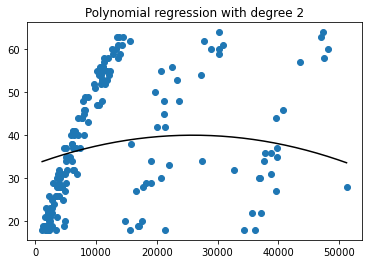

In [159]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()